<img style="float: left;" src="earth-lab-logo-rgb.png" width="150" height="150" />

# Earth Analytics Education - EA  Python Course Spring 2021

## Important  - Assignment Guidelines

1. Before you submit your assignment to GitHub, make sure to run the entire notebook with a fresh kernel. To do this first, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart & Run All)
2. Always replace the `raise NotImplementedError()` code with your code that addresses the activity challenge. If you don't replace that code, your notebook will not run.

```
# YOUR CODE HERE
raise NotImplementedError()
```

3. Any open ended questions will have a "YOUR ANSWER HERE" within a markdown cell. Replace that text with your answer also formatted using Markdown.
4. **DO NOT RENAME THIS NOTEBOOK File!** If the file name changes, the autograder will not grade your assignment properly.
6. When you create a figure, comment out `plt.show()` to ensure the autograder can grade your plots. For figure cells, DO NOT DELETE the code that says `DO NOT REMOVE LINE BELOW`.

```
### DO NOT REMOVE LINE BELOW ###
student_plot1_ax = nb.convert_axes(plt)
```

* Only include the package imports, code, and outputs that are required to run your homework assignment.
* Be sure that your code can be run on any operating system. This means that:
   1. the data should be downloaded in the notebook to ensure it's reproducible
   2. all paths should be created dynamically using the `os.path.join`

## Follow to PEP 8 Syntax Guidelines & Documentation

* Run the `autopep8` tool on all cells prior to submitting (HINT: hit shift + the tool to run it on all cells at once!
* Use clear and expressive names for variables. 
* Organize your code to support readability.
* Check for code line length
* Use comments and white space sparingly where it is needed
* Make sure all python imports are at the top of your notebook and follow PEP 8 order conventions
* Spell check your Notebook before submitting it.

For all of the plots below, be sure to do the following:

* Make sure each plot has a clear TITLE and, where appropriate, label the x and y axes. Be sure to include UNITS in your labels.


### Add Your Name Below 
**Your Name:** Maeve McCormick

<img style="float: left;" src="colored-bar.png"/>

---

# Week 04 and 05 Homework - Automate NDVI Workflow

For this assignment, you will write code to generate a plot of the mean normalized difference vegetation index (NDVI) for two different sites in the United States across one year of data:

* San Joaquin Experimental Range (SJER) in Southern California, United States
* Harvard Forest (HARV) in the Northeastern United States

The data that you will use for this week is available from **earthpy** using the following download: 

`et.data.get_data('ndvi-automation')`

## Assignment Goals

Your goal in this assignment is to create the most efficient and concise workflow that you can that allows for:

1. The code to scale if you added new sites or more time periods to the analysis.
2. Someone else to understand your workflow.
3. The LEAST and most efficient (i.e. runs fast, minimize repetition) amount of code that completes the task.

### HINTS

* Remove values outside of the landsat valid range of values as specified in the metadata, as needed.
* Keep any output files SEPARATE FROM input files. Outputs should be created in an outputs directory that is created in the code (if needed) and/or tested for.
* Use the functions that we demonstrated during class to make your workflow more efficient.
* BONUS - if you  chose - you can export your data as a csv file. You will get bonus points for doing this.


## Assignment Requirements

Your submission to the GitHub repository should include:
* This Jupyter Notebook file (.ipynb) with:
    * The code to create a plot of mean NDVI across a year for  2 NEON Field Sites:
        * NDVI on the x axis and formatted dates on the y for both NEON sites on one figure/axis object
    * The **data should be cleaned to remove the influence of clouds**. See the [earthdatascience website for an example of what your plot might look like with and without removal of clouds](https://www.earthdatascience.org/courses/earth-analytics-python/create-efficient-data-workflows/).
* BONUS: Create one output `.csv` file that has 3 columns - NDVI, Date and Site Name - with values for SJER and HARV.

Your notebook should:
* Have *at least* 2 well documented and well named functions with docstrings.
* Include a Markdown cell at the top of the notebook that outlines the overall workflow using pseudocode (i.e. plain language, not code)
* Include additional Markdown cells throughout the notebook to describe: 
    * the data that you used - and where it is from
    * how data are being processing
    * how the code is optimized to run fast and be more concise

# Replace this cell with your pseudocode  for this workflow

If you happen to be a diagram person a diagram is ok too



## Maeve's workflow:
* Import needed packages, set the working directory, and download the data with earthpy.
* Define a variable for the values used for cloud masking right away because you'll need it throughout the script and it's nice to have at the top of your workflow so it gets called right away.
* Pick a single scene from a single site and use it to figure out what you need to do to grab and then process the needed files (clipping, masking, etc).
* Write functions to automate the step-by-step workflow you come up with (probably one to get the files and a separate one to crop, mask, and calculate ndvi). **Make sure you replace any specific variables/parameter names with generic ones so the functions work universally, and not just on a given part of the data.**
* Test your functions on the single site again to make sure they work and return a reasonable/expected result.
* Calculate mean ndvi from the cropped and masked ndvi.
* Pull the date and site name from the file name/directory path and store those in a list with the mean ndvi values.
* Convert the list to a dataframe and reset the index to the date column.
* Write a series of nested loops using your functions to automate through *all* of the data in the directories.
    * The outermost loop should cycle through sites (make it generic enough - we only have two in this case but it could be adapted to loop through more sites if the data were available).
    * The crop boundary and pixel qa files should probably be selected in this outer loop, so that those steps aren't repeated for each scene and only change from site to site.
    * Nest a second loop within the outer loop to loop through each scene file within the sites directories. This loop should apply the functions you wrote, calculate mean ndvi, pull scene date from the file or directory name, and then compile site name, date, and mean ndvi in a list.
    * You may need more than one inner loop, but I think just the two nested ones are enough.
* Outside the loops, convert the list of ndvi and other attributes to a dataframe, as you did for the single site above. Remember to format the date and reset the index to the date column.
* Plot mean ndvi vs date using the dataframe object you generated with the loop!

In [1]:
# Autograding imports - do not modify this cell
import matplotcheck.autograde as ag
import matplotcheck.notebook as nb
import matplotcheck.timeseries as ts
from datetime import datetime

In [2]:
# Import needed packages in PEP 8 order
# and no unused imports listed (10 points total)
import os
from glob import glob

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.axes._axes import _log as matplotlib_axes_logger

import numpy as np
import pandas as pd
import rasterio as rio
import rioxarray as rxr
import xarray as xr

import earthpy as et
import geopandas as gpd
import seaborn as sns
import warnings

# Prettier plotting with seaborn
sns.set_style('white')
sns.set(font_scale=1.5)
# Suppress a warning about nan values in the ndvi calculation
warnings.simplefilter('ignore')

# Download the necessary data using earthpy
et.data.get_data('ndvi-automation')

# Define a variable for the working directory path.
wd_path = os.path.join(et.io.HOME,
                       "earth-analytics",
                       "data")
# Set the working directory or make the directory if it does not already exist.
if os.path.exists(wd_path):
    os.chdir(wd_path)
    print("The current working directory is", wd_path)
else:
    os.makedirs(wd_path)
    os.chdir(wd_path)
    print("The path does not exist but is being created")

The current working directory is C:\Users\maeve\earth-analytics\data


In [3]:
# DO NOT MODIFY THIS CELL
# Tests that the working directory is set to earth-analytics/data

path = os.path.normpath(os.getcwd())
student_wd_parts = path.split(os.sep)

if student_wd_parts[-2:] == ['earth-analytics', 'data']:
    print("\u2705 Great - it looks like your working directory is set correctly to ~/earth-analytics/data")
else:
    print("\u274C Oops, the autograder will not run unless your working directory is set to earth-analytics/data")

✅ Great - it looks like your working directory is set correctly to ~/earth-analytics/data


# Figure 1: Plot 1 - Mean NDVI For Each Site Across the Year (50 points)

Create a plot of the mean normalized difference vegetation index (NDVI) for the two different sites in the United States across the year: 

* NDVI on the x axis and formatted dates on the y for both NEON sites on one figure/axis object.
* Each site should be identified with a different color in the plot and legend.
* The final plot **data should be cleaned to remove the influence of clouds**.
* Be sure to include appropriate title and axes labels.

Add additional cells as needed for processing data (e.g. defining functions, etc), but be sure to:
* follow the instructions in the code cells that have been provided to ensure that you are able to use the sanity check tests that are provided. 
* include only the plot code in the cell identified for the final plot code below

## Task 1: 

In the cell below, create a single dataframe containing MEAN NDVI, the site name, 
and the date of the data for the HARV site 
scene `HARV/landsat-crop/LC080130302017031701T1-SC20181023151837`.  The column names for the  final
DataFrame should be`mean_ndvi`, and `site`, and the data should be **indexed on the date**. 

Use the functions that we reviewed in class (or create your own versions of them) to implement your code

### In the Cell below Place  All Functions Needed to Run this Notebook (20 points)

In [4]:
### DO NOT REMOVE THIS LINE OR EDIT / MOVE THIS CELL ###
start_time = datetime.now()

In [5]:
# In this cell place all of the functions needed to run your notebook
# You will be graded here on function application, docstrings, efficiency so ensure
# All functions are placed here!


def get_bands(band_directory, valid_range=None):
    """Get a sorted list of paths to the files containing landsat bands 4 and 5
    and open the files as xarray objects.

    Parameters
    ----------
    band_directory : string
        A string describing the file directory containing the landsat bands.
    
    valid_range : tuple (optional)
        A tuple containing the valid range (min and max) of expected values
        (default input is none).

    Returns
    ----------
    all_bands : list
        A list of two xarray DataArray objects, one for each landsat band.
    """
    # Get a list of bands 4 and 5
    band_paths = sorted(glob(os.path.join(band_directory,
                                          "*band*[4-5].tif")))

    # Open the bands, mask for valid values, and append them to a list
    all_bands = []
    for path in band_paths:
        a_band = rxr.open_rasterio(path, masked=True).squeeze()
        if valid_range is not None:
            mask = ((a_band < valid_range[0]) | (a_band > valid_range[1]))
            a_band = a_band.where(~xr.where(mask, True, False))

        all_bands.append(a_band)

    return all_bands


def mask_crop_ndvi(all_bands,
                   crop_bound,
                   pixel_qa,
                   vals):
    """Calculate normalized difference vegetation index (NDVI) from the
    provided landsat bands. Clip the output NDVI layer and the given
    pixel qa layer to the boundary specified by the crop_bound file. Use the
    cropped pixel qa layer and vals to apply a cloud mask to the cropped NDVI.
    Save the cropped and masked NDVI layer as an xarray.

    Parameters
    -----------
    all_bands : list
        A list containing the xarray objects for landsat  bands 4 and  5.

    crop_bound: geopandas GeoDataFrame
        A geopandas dataframe to be used to crop the raster data using
        rasterio mask().

    pixel_qa: xarray DataArray
        An xarray DataArray with pixel qa values that have not yet been turned
        into a mask (0s and 1s).

    vals: list
        A list of values needed to create the cloud mask.

    Returns
    -----------
    ndvi_crop : xarray DataArray
        A cropped and masked xarray object containing NDVI values.
    """

    crop_json = crop_bound.geometry

    # Clip pixel qa cloud mask layer
    cl_mask_crop = pixel_qa.rio.clip(crop_json)

    # Calculate NDVI
    ndvi_xr = (all_bands[1]-all_bands[0]) / (all_bands[1]+all_bands[0])
    # Clip NDVI layer
    ndvi_crop = ndvi_xr.rio.clip(crop_json)

    # Apply cloud mask to NDVI
    ndvi_crop = ndvi_crop.where(~cl_mask_crop.isin(vals))

    return ndvi_crop

##### Reminders from instructor comments
` Important: to use the ungraded tests below as a sanity check, name your columns: mean_ndvi and site
 Call the dataframe at the end of the cell so the tests run on it!
 Be sure that the date column is an index of type date
 HINT: the time series lessons may help you remember how to do this!`
 
### Preliminary Setup
The following cell contains code that defines variables for the directories that will be looped through later in the workflow. The code also defines a list of vaules used for cloud masking.

In [6]:
# Define site paths
sites_path = os.path.join("ndvi-automation", "sites")
all_sites = sorted(glob(os.path.join(sites_path, '*/')))
# Name a variable for the folder containing landsat files
landsat_dir = "landsat-crop"

# List the cloud no data vals for Landsat 8:
vals = [328, 392, 840, 904, 1350, 352, 368, 416,
        432, 480, 864, 880, 928, 944, 992, 480, 992]
# Specify a valid range of landsat values:
valid_range = (0, 10000)

#### Single HARV scene setup
The following cell defines the directory for the specific HARV scene we've been asked to analyze. It also pulls the site name and the date from the directory and navigates to and opens the qa layer and crop layer.

In [7]:
# File path to single scene
harv_single_path = os.path.join(sites_path,
                                "HARV",
                                "landsat-crop",
                                "LC080130302017031701T1-SC20181023151837")
# Get site name and date from directory name
dir_name = os.path.basename(os.path.normpath(harv_single_path))
date = dir_name[10:18]
site_name = os.path.basename(os.path.normpath(all_sites[0]))

# Open scene qa and site boundary files
harv_single_qa_path = glob(os.path.join(harv_single_path,
                                        "*qa*"))
qa_layer = rxr.open_rasterio(harv_single_qa_path[0], masked=True).squeeze()
boundary_path = os.path.join(sites_path,
                             site_name,
                             "vector",
                             site_name + "-crop.shp")
boundary = gpd.read_file(boundary_path)

#### Single site workflow

In [8]:
# Create dataframe of mean NDVI in this cell using the functions created above
# Get bands then crop, mask, and calculate ndvi
all_bands = get_bands(harv_single_path, valid_range)
ndvi_value = mask_crop_ndvi(all_bands,
                            boundary,
                            qa_layer,
                            vals)
# Calculate mean ndvi
ndvi_mean = np.nanmean(ndvi_value)

# Capture the mean ndvi, site name, and date in a list
ndvi_list = []
ndvi_list.append([site_name, date, ndvi_mean])

# Convert the NDVI list generated above to a dataframe and rename the columns.
harv_single_mean_ndvi = pd.DataFrame(ndvi_list,
                                     columns=["site", "date", "mean_ndvi"])
harv_single_mean_ndvi['date'] = pd.to_datetime(harv_single_mean_ndvi['date'],
                                               format='%Y%m%d')
harv_single_mean_ndvi = harv_single_mean_ndvi.set_index(['date'])
harv_single_mean_ndvi

,site,mean_ndvi
date,,
2017-03-17,HARV,0.281132


In [9]:
# This cell  is testing your data output above

student_ndvi_ts_single_site = _

single_scene_points = 0

# Ensure the data is stored in a dataframe.
if isinstance(student_ndvi_ts_single_site, pd.DataFrame):
    print('\u2705 Your data is stored in a DataFrame!')
    single_scene_points += 1
else:
    print('\u274C It appears your data is not stored in a DataFrame. ',
          'To see what type of object your data is stored in, check its type with type(object)')

# Ensure that the date column is the index
if isinstance(student_ndvi_ts_single_site.index, pd.core.indexes.datetimes.DatetimeIndex):
    print('\u2705 You have the index set to the date column!')
    single_scene_points += 2
else:
    print('\u274C You do not have the index set to the date column.')

# Ensure that the date column is datetime
if isinstance(student_ndvi_ts_single_site.index[0], pd._libs.tslibs.timestamps.Timestamp):
    print('\u2705 The data in your date column is datetime!')
    single_scene_points += 2
else:
    print('\u274C The data in your date column is not datetime.')

# Ensure the site name is correct
if student_ndvi_ts_single_site.site.values[0] == 'HARV':
    print('\u2705 You have the correct site name!')
    single_scene_points += 5
else:
    print('\u274C You do not have the correct site name.')

if np.allclose(0.281131628228094, student_ndvi_ts_single_site.mean_ndvi.values[0]):
    print('\u2705 You have the correct mean NDVI value!')
    single_scene_points += 5
else:
    print('\u274C You do not have the correct mean ndvi value.')

print("\n \u27A1 You received {} out of 15 points for creating a dataframe.".format(
    single_scene_points))
single_scene_points

✅ Your data is stored in a DataFrame!
✅ You have the index set to the date column!
✅ The data in your date column is datetime!
✅ You have the correct site name!
✅ You have the correct mean NDVI value!

 ➡ You received 15 out of 15 points for creating a dataframe.


15

## Task 2:

In the cell below, process all of the landsat scenes. Create a DataFrame that contains the following 
information for each scene


|   | index  | site  | mean_ndvi  | 
|---|---|---|---|
| Date  |   |   |   |
|  2017-01-07  | 0  | SJER  | .4  |  

Be sure to call your dataframe at the end of the cell to ensure autograding works.
HINT: FOR THIS STEP, leave any rows containing missing values (`NAN`).

In [10]:
# Loop through all directories and apply the functions you wrote.
''' This loop contains optional 'print' statements to help track progress.
They are flagged with '# OPTIONAL PRINT' at the end of the line.
Uncomment the ones you wish to use.'''

# Create an empty list for storing ndvi values.
ndvi_list = []

# Loop through each site directory.
for site_files in all_sites:
    #print("I am looping through", site_files) # OPTIONAL PRINT
    a_site = os.path.split(os.path.normpath(site_files))[1]
    print("I am working on the", a_site, "field site now.")

    # Get the boundary shapefile for clipping from the vector directory.
    vector_dir = os.path.join(site_files, "vector")
    boundary_path = os.path.join(vector_dir,  a_site + "-crop.shp")
    boundary = gpd.read_file(boundary_path)
    #print("The current boundary path is", boundary_path) # OPTIONAL PRINT

    # Get a list of subdirectories for the current site.
    new_path = os.path.join(site_files, landsat_dir)
    all_dirs = sorted(glob(os.path.join(new_path, "*/")))

    #  Loop through  each subdirectory where your data are stored.
    for a_dir in all_dirs:
        #print("Now processing", a_dir) # OPTIONAL PRINT
        # Get the date from the directory name
        dir_name = os.path.basename(os.path.normpath(a_dir))
        date = dir_name[10:18]

        # Get cloud mask layer (qa file)
        qa_path = glob(os.path.join(a_dir, "*qa*"))
        qa_layer = rxr.open_rasterio(qa_path[0], masked=True).squeeze()

        # Get landsat bands 4 and 5, crop and mask them, and calculate ndvi
        all_bands = get_bands(a_dir, valid_range)
        ndvi_value = mask_crop_ndvi(all_bands,
                                    boundary,
                                    qa_layer,
                                    vals)
        # Calculate mean NDVI
        ndvi_mean = np.nanmean(ndvi_value)

        # Capture  the site name, and  date in  a list
        ndvi_list.append([a_site, date, ndvi_mean])

print("Processing complete.")

I am working on the HARV field site now.
I am working on the SJER field site now.
Processing complete.


In [11]:
# Create dataframe of NDVI including the cleaning data to deal with clouds
# Convert the NDVI list generated above to a dataframe and rename the columns.
mean_ndvi = pd.DataFrame(ndvi_list,
                         columns=["site", "date", "mean_ndvi"])
mean_ndvi['date'] = pd.to_datetime(mean_ndvi['date'], format='%Y%m%d')
mean_ndvi.reset_index(inplace=True)
mean_ndvi.set_index(['date'], inplace=True)
mean_ndvi

,index,site,mean_ndvi
date,,,
2017-01-12,0,HARV,NaN
2017-01-28,1,HARV,NaN
2017-02-13,2,HARV,NaN
2017-03-01,3,HARV,NaN
2017-03-17,4,HARV,0.281132
2017-04-02,5,HARV,0.251133
2017-04-18,6,HARV,0.541080
2017-05-04,7,HARV,0.568924
2017-05-20,8,HARV,0.811310


In [12]:
# Last sanity check before creating your plot (10 points)

# Ensure that you call your dataframe at the bottom of the cell above
# and that it has columns called: mean_ndvi and site

# Ensure the data is stored in a dataframe.
student_ndvi_df = _

df_points = 0

if isinstance(student_ndvi_df, pd.DataFrame):
    print('\u2705 Your data is stored in a DataFrame!')
    df_points += 2
else:
    print('\u274C It appears your data is not stored in a DataFrame. ',
          'To see what type of object your data is stored in, check its type with type(object)')

# Check that dataframe contains the appropriate number of NAN values
if student_ndvi_df.mean_ndvi.isna().sum() == 15:
    print('\u2705 Correct number of masked data values!')
    df_points += 2
else:
    print('\u274C The amount of null data in your dataframe is incorrect.')


# Ensure that the date column is the index
if isinstance(student_ndvi_df.index, pd.core.indexes.datetimes.DatetimeIndex):
    print('\u2705 You have the index set to the date column!')
    df_points += 3
else:
    print('\u274C You do not have the index set to the date column.')

# Ensure that the date column is datetime
if isinstance(student_ndvi_df.index[0], pd._libs.tslibs.timestamps.Timestamp):
    print('\u2705 The data in your date column is datetime!')
    df_points += 3
else:
    print('\u274C The data in your date column is not datetime.')

# Output for timer, # DO NOT MODIFY
end_time = datetime.now()
total_time = end_time - start_time
print(
    "Your total run time for processing the data was {0}.".format(total_time))

print("\n \u27A1 You received {} out of 10 points for creating a dataframe.".format(
    df_points))

df_points

✅ Your data is stored in a DataFrame!
✅ Correct number of masked data values!
✅ You have the index set to the date column!
✅ The data in your date column is datetime!
Your total run time for processing the data was 0:00:24.487634.

 ➡ You received 10 out of 10 points for creating a dataframe.


10

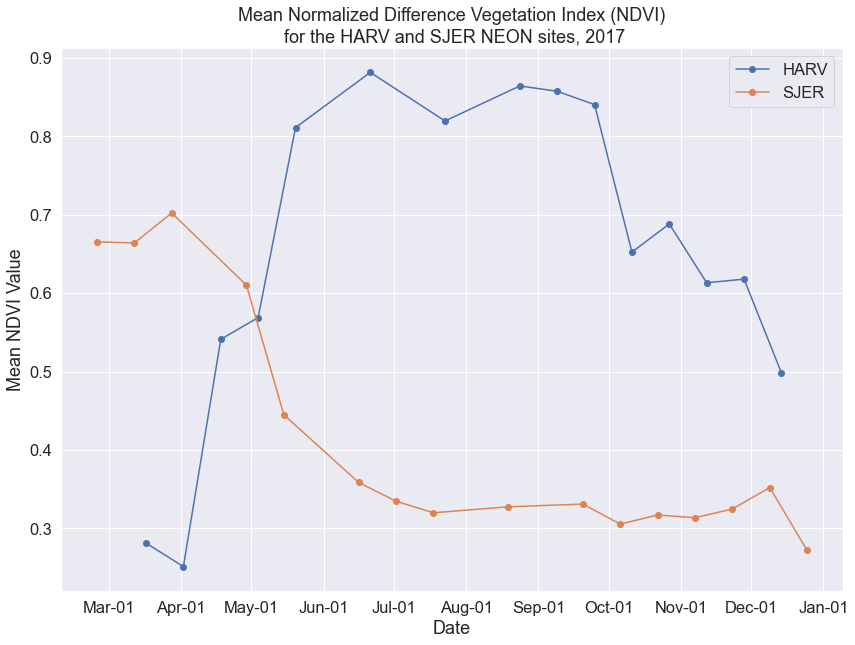

In [13]:
# Plot mean NDVI for both sites across the year.
fig1, ax1 = plt.subplots(figsize=(14, 10))

# Group the data by site
ndvi_site_gr = mean_ndvi.dropna().groupby('site')

for site, group in ndvi_site_gr:
    ax1.plot(group.index.values,
             group['mean_ndvi'].values,
             label=site,
             marker='o')

# Format plot axes and title
ax1.set(xlabel='Date',
        ylabel='Mean NDVI Value',
        title='Mean Normalized Difference Vegetation Index (NDVI)\n for the HARV and SJER NEON sites, 2017')
ax1.legend()

# Define date format
date_form = DateFormatter("%b-%d")
ax1.xaxis.set_major_formatter(date_form)

### DO NOT REMOVE LINES BELOW ###
final_masked_solution = nb.convert_axes(plt, which_axes="current")

In [14]:
# Ignore this cell for the autograding tests

In [15]:
# Ignore this cell for the autograding tests

# Question 1 (10 points)

Imagine that you are planning NEON’s upcoming flight season to capture remote sensing data in these locations and want to ensure that you fly the area when the vegetation is the most green.

When would you recommend the flights take place for each site? 

Answer the question in 2-3 sentences in the Markdown cell below.

The San Joaquin Experimental Range is located near Fresno, CA, an area with a Mediterranean climate. The open oak woodland typically reaches peak greenness in early March. Harvard Forest (near Boston, MA) is a northern hardwood and coniferous forest in a relatively cool and temperate climate. However, warming temperatures have resulted in an earlier onset of spring weather patterns, and average peak greenness at this location is now also reached by early March. In order to ideally capture peak greenness conditions, NEON flights for these sites would occur the first or second week of March.

# Question 2 (10 points)

How could you modify your workflow to look at vegetation changes over time in each site? 

Answer the question in 2-3 sentences in the Markdown cell below.

In order to look at changes in vegetation over time, I'd first obtain landsat data from an additional year. I'd process the data the same way those from 2017 were in this workflow, and then additionally calculate a difference in mean ndvi from year to year. The difference operation could probably be added to the end of the multi-site processing loop.

# Do not edit this cell! (10 points)

The notebook includes:
* additional Markdown cells throughout the notebook to describe: 
    * the data that you used - and where it is from
    * how data are being processing
    * how the code is optimized to run fast and be more concise

# Do not edit this cell! (20 points)

The notebook will also be checked for overall clean code requirements as specified at the **top** of this notebook. Some of these requirements include (review the top cells for more specifics): 

* Notebook begins at cell [1] and runs on any machine in its entirety.
* PEP 8 format is applied throughout (including lengths of comment and code lines).
* No additional code or imports in the notebook that is not needed for the workflow.
* Notebook is fully reproducible. This means:
   * reproducible paths using the os module.
   * data downloaded using code in the notebook.
   * all imports at top of notebook.

## BONUS - Export a  .CSV File to Share (10 points possible)

This is optional - if you export a **.csv** file with the columns specified above: Site, Date and NDVI Value you can get an additional 10 points.

* FULL CREDIT: File exists in csv format and contains the columns specified.
We will check your github repo for this file!
